In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier

os.chdir("/home/user/michigan/data/AGM/features")




In [2]:
def get_MOA(comp):
    return comp_moa[comp_moa["compound"]==comp]["moa"].values[0]

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(10, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
def produce_result(result):
    result["correct"] = result["y"] == result["y_pred"]
    overall_acc = result["correct"].mean()
    print("overall MoA accurarcy:", overall_acc)
    print("each MoA results: ", result.groupby("y").mean())
    confu_mat = confusion_matrix(result["y"], result["y_pred"], labels = result["y"].value_counts().sort_index().index)
    plot_confusion_matrix(confu_mat,classes=result["y"].value_counts().sort_index().index)

In [3]:
data = pd.DataFrame()
for i in os.listdir():
    tmp = pd.read_csv(i) if ".csv" in i else None
    data = data.append(tmp)
    print(data.shape)

(0, 0)
(54962, 516)
(102478, 516)
(144176, 516)
(171222, 516)
(200369, 516)
(227793, 516)
(267748, 516)
(309821, 516)
(352488, 516)
(373522, 516)
(395769, 516)
(418213, 516)
(451509, 516)
(466097, 516)
(488591, 516)
(519811, 516)
(549079, 516)
(582457, 516)
(624286, 516)
(664382, 516)
(706458, 516)
(737187, 516)
(784511, 516)
(820636, 516)
(863431, 516)
(903389, 516)
(940508, 516)
(981883, 516)
(1030386, 516)
(1076644, 516)
(1123225, 516)
(1174952, 516)
(1227153, 516)
(1257114, 516)
(1293015, 516)
(1318525, 516)
(1351044, 516)
(1384050, 516)
(1399486, 516)
(1433075, 516)
(1460766, 516)
(1508237, 516)
(1552039, 516)
(1592586, 516)
(1612834, 516)
(1636684, 516)
(1653181, 516)
(1672266, 516)
(1692494, 516)
(1715737, 516)
(1740408, 516)
(1765753, 516)
(1780321, 516)
(1803291, 516)
(1817329, 516)


In [4]:
data.shape

(1817329, 516)

In [182]:
for i in data.columns:
    print(i)

row ID
ImageNumber_Nuclei
ObjectNumber_Nuclei
Metadata_FieldID_Nuclei
Metadata_FieldID(2)_Nuclei
Metadata_FileLocation_Nuclei
Metadata_Frame_Nuclei
Metadata_PlateID_Nuclei
Metadata_PlateID(2)_Nuclei
Metadata_Series_Nuclei
Metadata_WellID_Nuclei
Metadata_WellID(2)_Nuclei
Metadata_hash_Nuclei
Metadata_path_Nuclei
Metadata_plateID1_Nuclei
AreaShape_Area_Nuclei
AreaShape_Center_X_Nuclei
AreaShape_Center_Y_Nuclei
AreaShape_Center_Z_Nuclei
AreaShape_Compactness_Nuclei
AreaShape_Eccentricity_Nuclei
AreaShape_EulerNumber_Nuclei
AreaShape_Extent_Nuclei
AreaShape_FormFactor_Nuclei
AreaShape_MajorAxisLength_Nuclei
AreaShape_MaxFeretDiameter_Nuclei
AreaShape_MaximumRadius_Nuclei
AreaShape_MeanRadius_Nuclei
AreaShape_MedianRadius_Nuclei
AreaShape_MinFeretDiameter_Nuclei
AreaShape_MinorAxisLength_Nuclei
AreaShape_Orientation_Nuclei
AreaShape_Perimeter_Nuclei
AreaShape_Solidity_Nuclei
AreaShape_Zernike_0_0_Nuclei
AreaShape_Zernike_1_1_Nuclei
AreaShape_Zernike_2_0_Nuclei
AreaShape_Zernike_2_2_Nuclei
A

In [5]:
week1 = pd.read_csv("Week1_22123_Joined.csv")

In [46]:
for i in data.columns:
    if "Meta" in i and "Image" not in i:
        print(i)
        data=data.drop(i, axis = 1)

Metadata_FieldID_Nuclei
Metadata_FieldID(2)_Nuclei
Metadata_FileLocation_Nuclei
Metadata_Frame_Nuclei
Metadata_PlateID_Nuclei
Metadata_PlateID(2)_Nuclei
Metadata_Series_Nuclei
Metadata_WellID_Nuclei
Metadata_WellID(2)_Nuclei
Metadata_hash_Nuclei
Metadata_path_Nuclei
Metadata_plateID1_Nuclei
Metadata_FieldID(2)_Cytoskeleton
Metadata_FileLocation_Cytoskeleton
Metadata_Frame_Cytoskeleton
Metadata_PlateID(2)_Cytoskeleton
Metadata_Series_Cytoskeleton
Metadata_WellID(2)_Cytoskeleton
Metadata_hash_Cytoskeleton
Metadata_path_Cytoskeleton
Metadata_plateID1_Cytoskeleton
Metadata_FieldID(2)_Cells
Metadata_FileLocation_Cells
Metadata_Frame_Cells
Metadata_PlateID(2)_Cells
Metadata_Series_Cells
Metadata_WellID(2)_Cells
Metadata_hash_Cells
Metadata_path_Cells
Metadata_plateID1_Cells


In [65]:
data.shape

(1817329, 486)

In [5]:
GroundTruth = pd.read_csv("/home/user/michigan/data/Ljosa-BBBC021/database/supplement_GroundTruth.txt", 
                          sep = "\t", names = ["compound","concentration","moa"])

In [159]:
treatment_profile = data.groupby(["Metadata_Image_Metadata_Compound","Metadata_Image_Metadata_Concentration"], as_index=False).mean()
treatment_profile = treatment_profile[treatment_profile["Metadata_Image_Metadata_Compound"]!="DMSO"].drop(
    ["ImageNumber_Nuclei", "ObjectNumber_Nuclei"], axis=1)

In [160]:
treatment_profile = GroundTruth.merge(treatment_profile, left_on = ["compound", "concentration"],
                  right_on = ["Metadata_Image_Metadata_Compound","Metadata_Image_Metadata_Concentration"], how = "left")
treatment_profile = treatment_profile[treatment_profile["compound"] != "DMSO"]

In [161]:
treatment_profile = treatment_profile.drop(["compound", "concentration", "moa"], axis =1)
X = np.array(treatment_profile.drop("Metadata_Image_Metadata_Compound", axis=1))
y = np.array(treatment_profile["Metadata_Image_Metadata_Compound"])

In [167]:
comp_moa = GroundTruth.drop("concentration", axis = 1).drop_duplicates()

In [168]:
result = pd.DataFrame()
for i in range(len(X)):
    masked_index = y == y[i]
    X_train = X[masked_index == False]
    y_train = y[masked_index == False]
    
    X_test = X[i:(i+1)]
    y_test = y[i]

    
    neigh = KNeighborsClassifier(
    n_neighbors=1, algorithm='brute', metric='cosine')
    neigh.fit(X_train, y_train)
    
    pred = neigh.predict(X_test)
    result = result.append({"y":get_MOA(y_test),"y_pred":get_MOA(pred[0])}, ignore_index=True)

overall MoA accurarcy: 0.34951456310679613
each MoA results:                              correct
y                                  
Actin disruptors           0.400000
Aurora kinase inhibitors   0.250000
Cholesterol-lowering       1.000000
DNA damage                 0.333333
DNA replication            0.500000
Eg5 inhibitors             0.000000
Epithelial                 0.000000
Kinase inhibitors          0.800000
Microtubule destabilizers  0.357143
Microtubule stabilizers    0.444444
Protein degradation        0.142857
Protein synthesis          0.500000


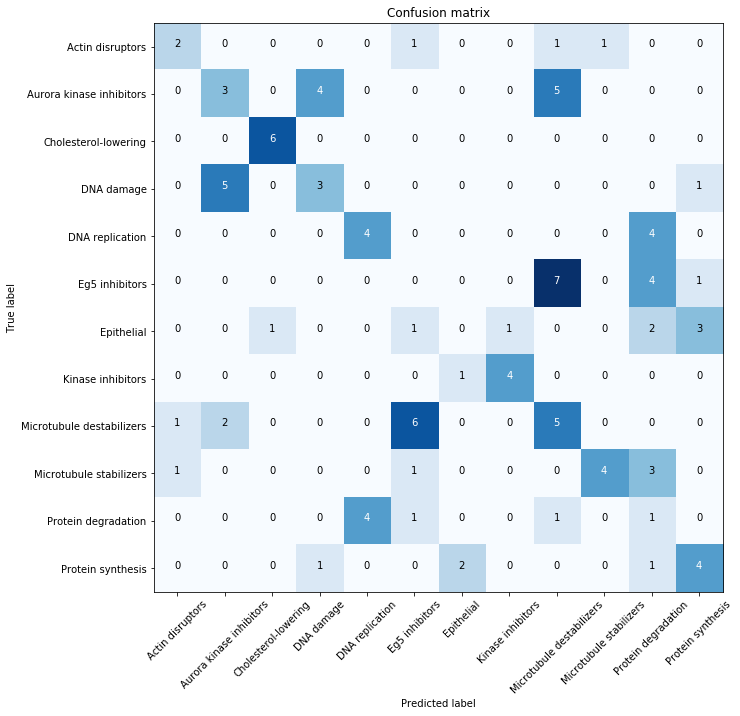

In [170]:
produce_result(result)

# Z-score prediction

In [ ]:
partial_data = pd.read_csv("/home/user/michigan/att_pooling/moa_data.csv")

### RF

In [268]:
partial_data[partial_data["Metadata_Image_Metadata_Compound"]!="DMSO"]

,compound,concentration,moa,row ID,ImageNumber_Nuclei,ObjectNumber_Nuclei,Metadata_FieldID_Nuclei,Metadata_FieldID(2)_Nuclei,Metadata_FileLocation_Nuclei,Metadata_Frame_Nuclei,...,Texture_SumVariance_Actin_5_02_Cells,Texture_SumVariance_Actin_5_03_Cells,Texture_Variance_Actin_5_00_Cells,Texture_Variance_Actin_5_01_Cells,Texture_Variance_Actin_5_02_Cells,Texture_Variance_Actin_5_03_Cells,Iteration (#2),Metadata_Image_Metadata_Compound,Metadata_Image_Metadata_Concentration,COND
0,PP-2,3.0,Epithelial,Row939480_Row9914#28_Row9914#28_Row11412,9973,1,s1,s1,NaN,0,...,222.875480,188.909601,60.635510,59.514417,62.449050,59.052566,28,PP-2,3.0,Compound
1,PP-2,3.0,Epithelial,Row939481_Row9915#28_Row9915#28_Row11412,9973,2,s1,s1,NaN,0,...,662.956229,537.123532,191.529340,186.657887,198.370614,186.286542,28,PP-2,3.0,Compound
2,PP-2,3.0,Epithelial,Row939482_Row9916#28_Row9916#28_Row11412,9973,3,s1,s1,NaN,0,...,429.545049,401.909222,116.299145,106.473279,115.461831,120.087047,28,PP-2,3.0,Compound
3,PP-2,3.0,Epithelial,Row939483_Row9917#28_Row9917#28_Row11412,9973,4,s1,s1,NaN,0,...,123.066484,109.346974,32.007437,31.852089,35.937538,34.051240,28,PP-2,3.0,Compound
4,PP-2,3.0,Epithelial,Row939484_Row9918#28_Row9918#28_Row11412,9973,5,s1,s1,NaN,0,...,34.046913,33.302410,9.894735,9.680267,10.297791,10.412360,28,PP-2,3.0,Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421037,cyclohexamide,15.0,Protein synthesis,Row467252_Row1616#13_Row1616#13_Row6251,1212,72,s4,s4,NaN,0,...,398.655400,380.615689,122.745817,129.469574,126.166164,126.438026,13,cyclohexamide,15.0,Compound
421038,cyclohexamide,15.0,Protein synthesis,Row467253_Row1617#13_Row1617#13_Row6251,1212,73,s4,s4,NaN,0,...,49.533302,40.970936,16.535124,17.384078,17.036591,15.288311,13,cyclohexamide,15.0,Compound
421039,cyclohexamide,15.0,Protein synthesis,Row467254_Row1618#13_Row1618#13_Row6251,1212,74,s4,s4,NaN,0,...,109.139351,103.760015,33.461394,32.624373,32.792149,33.678459,13,cyclohexamide,15.0,Compound
421040,cyclohexamide,15.0,Protein synthesis,Row467255_Row1619#13_Row1619#13_Row6251,1212,75,s4,s4,NaN,0,...,17.636199,17.008672,5.572088,5.590772,5.595931,5.528827,13,cyclohexamide,15.0,Compound


In [188]:
partial_data

,compound,concentration,moa,ImageNumber_Nuclei,ObjectNumber_Nuclei,AreaShape_Area_Nuclei,AreaShape_Center_X_Nuclei,AreaShape_Center_Y_Nuclei,AreaShape_Center_Z_Nuclei,AreaShape_Compactness_Nuclei,...,Texture_SumVariance_Actin_5_02_Cells,Texture_SumVariance_Actin_5_03_Cells,Texture_Variance_Actin_5_00_Cells,Texture_Variance_Actin_5_01_Cells,Texture_Variance_Actin_5_02_Cells,Texture_Variance_Actin_5_03_Cells,Iteration (#2),Metadata_Image_Metadata_Compound,Metadata_Image_Metadata_Concentration,COND
0,PP-2,3.0,Epithelial,9973,1,853,333.0,18.0,1.0,1.036770,...,222.875480,188.909601,60.635510,59.514417,62.449050,59.052566,28,PP-2,3.0,Compound
1,PP-2,3.0,Epithelial,9973,2,1339,411.0,31.0,1.0,1.422083,...,662.956229,537.123532,191.529340,186.657887,198.370614,186.286542,28,PP-2,3.0,Compound
2,PP-2,3.0,Epithelial,9973,3,520,370.0,33.0,1.0,1.051240,...,429.545049,401.909222,116.299145,106.473279,115.461831,120.087047,28,PP-2,3.0,Compound
3,PP-2,3.0,Epithelial,9973,4,753,688.0,42.0,1.0,1.107093,...,123.066484,109.346974,32.007437,31.852089,35.937538,34.051240,28,PP-2,3.0,Compound
4,PP-2,3.0,Epithelial,9973,5,702,646.0,36.0,1.0,1.078265,...,34.046913,33.302410,9.894735,9.680267,10.297791,10.412360,28,PP-2,3.0,Compound
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421037,cyclohexamide,15.0,Protein synthesis,1212,72,882,517.0,940.0,1.0,1.010683,...,398.655400,380.615689,122.745817,129.469574,126.166164,126.438026,13,cyclohexamide,15.0,Compound
421038,cyclohexamide,15.0,Protein synthesis,1212,73,1194,1157.0,948.0,1.0,1.017653,...,49.533302,40.970936,16.535124,17.384078,17.036591,15.288311,13,cyclohexamide,15.0,Compound
421039,cyclohexamide,15.0,Protein synthesis,1212,74,2025,144.0,947.0,1.0,1.069043,...,109.139351,103.760015,33.461394,32.624373,32.792149,33.678459,13,cyclohexamide,15.0,Compound
421040,cyclohexamide,15.0,Protein synthesis,1212,75,1270,273.0,955.0,1.0,1.055648,...,17.636199,17.008672,5.572088,5.590772,5.595931,5.528827,13,cyclohexamide,15.0,Compound


In [236]:
moa = pd.read_csv("/home/user/michigan/data/BBBC021/BBBC021_v1_moa.csv")
moa = moa[moa["compound"]!="DMSO"]

In [225]:
meta1[meta1["Image_Metadata_Compound"]!="DMSO"]

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
0,4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,Week4/Week4_27481,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,Week4/Week4_27481,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
1,4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,Week4/Week4_27481,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,Week4/Week4_27481,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
2,4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,Week4/Week4_27481,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,Week4/Week4_27481,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
3,4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,Week4/Week4_27481,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,Week4/Week4_27481,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,Week4/Week4_27521,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,Week4/Week4_27521,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,Week4/Week4_27521,Week4_27521,G10,2,5-fluorouracil,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11875,3,3180,Week3_290607_C06_s4_w17AB2F316-96FE-432C-9ABF-...,Week3/Week3_25701,Week3_290607_C06_s4_w21097109D-6B1F-4C5A-8524-...,Week3/Week3_25701,Week3_290607_C06_s4_w49916B999-D6D9-4F5F-A934-...,Week3/Week3_25701,Week3_25701,C06,2,emetine,1.000
11876,3,3417,Week3_290607_C06_s1_w16863C3CE-84DD-41E7-9F58-...,Week3/Week3_25721,Week3_290607_C06_s1_w2310D60E4-22D5-4B90-BDAE-...,Week3/Week3_25721,Week3_290607_C06_s1_w4BDA6E64E-196C-411B-BE46-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.000
11877,3,3418,Week3_290607_C06_s2_w189AE7C06-F7C3-4782-AC20-...,Week3/Week3_25721,Week3_290607_C06_s2_w2D3269E69-AF4D-4F46-BA52-...,Week3/Week3_25721,Week3_290607_C06_s2_w4CE40326F-930B-4CCD-9299-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.000
11878,3,3419,Week3_290607_C06_s3_w1F5D1CAB0-4CEB-45C4-B63D-...,Week3/Week3_25721,Week3_290607_C06_s3_w2F3F67255-B9FF-4CDD-A728-...,Week3/Week3_25721,Week3_290607_C06_s3_w451F3E9B7-356A-459E-AD69-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.000


In [253]:
moa[moa["compound"]=="taxol"]

,compound,concentration,moa
40,taxol,1.0,Microtubule stabilizers
92,taxol,0.3,Microtubule stabilizers
96,taxol,3.0,Microtubule stabilizers


In [265]:
metaa1[(metaa1["TableNumber"]==0) & (metaa1["Image_PathName_DAPI"].str.contains("Week10_40115")) & (metaa1["Image_Metadata_Compound"]!="taxol")].shape

(32, 16)

In [258]:
metaa1

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
0,1,11,Week1_150607_B04_s3_w135D66B4C-0548-4AB8-A57B-...,Week1/Week1_22123,Week1_150607_B04_s3_w2D81AEFB9-9DD4-4B59-9177-...,Week1/Week1_22123,Week1_150607_B04_s3_w408BE006A-BF34-457E-81A9-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
1,1,12,Week1_150607_B04_s4_w1EB720AD1-83BA-48A7-8C47-...,Week1/Week1_22123,Week1_150607_B04_s4_w261B79A05-7534-46F3-8C80-...,Week1/Week1_22123,Week1_150607_B04_s4_w49FF7E7B1-F049-4994-BCA2-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
2,1,9,Week1_150607_B04_s1_w11323931B-BDA7-4F42-870E-...,Week1/Week1_22123,Week1_150607_B04_s1_w2F8F7EA7A-EC57-49CA-A556-...,Week1/Week1_22123,Week1_150607_B04_s1_w494DCA5C4-3531-497D-A8B0-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
3,1,10,Week1_150607_B04_s2_w1F649C703-6FA8-406F-8575-...,Week1/Week1_22123,Week1_150607_B04_s2_w2802CC81E-56F9-41C5-A6C2-...,Week1/Week1_22123,Week1_150607_B04_s2_w4342F300D-60F8-4256-A637-...,Week1/Week1_22123,Week1_22123,B04,1,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
4,1,251,Week1_150607_B04_s3_w1B0B8AAC7-F2AD-4756-939C-...,Week1/Week1_22141,Week1_150607_B04_s3_w25C7FD77E-FDC4-471F-A512-...,Week1/Week1_22141,Week1_150607_B04_s3_w42BD03411-D32F-4179-A6C5-...,Week1/Week1_22141,Week1_22141,B04,2,cytochalasin B,10.0,cytochalasin B,10.0,Actin disruptors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2523,3,3180,Week3_290607_C06_s4_w17AB2F316-96FE-432C-9ABF-...,Week3/Week3_25701,Week3_290607_C06_s4_w21097109D-6B1F-4C5A-8524-...,Week3/Week3_25701,Week3_290607_C06_s4_w49916B999-D6D9-4F5F-A934-...,Week3/Week3_25701,Week3_25701,C06,2,emetine,1.0,emetine,1.0,Protein synthesis
2524,3,3417,Week3_290607_C06_s1_w16863C3CE-84DD-41E7-9F58-...,Week3/Week3_25721,Week3_290607_C06_s1_w2310D60E4-22D5-4B90-BDAE-...,Week3/Week3_25721,Week3_290607_C06_s1_w4BDA6E64E-196C-411B-BE46-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.0,emetine,1.0,Protein synthesis
2525,3,3418,Week3_290607_C06_s2_w189AE7C06-F7C3-4782-AC20-...,Week3/Week3_25721,Week3_290607_C06_s2_w2D3269E69-AF4D-4F46-BA52-...,Week3/Week3_25721,Week3_290607_C06_s2_w4CE40326F-930B-4CCD-9299-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.0,emetine,1.0,Protein synthesis
2526,3,3419,Week3_290607_C06_s3_w1F5D1CAB0-4CEB-45C4-B63D-...,Week3/Week3_25721,Week3_290607_C06_s3_w2F3F67255-B9FF-4CDD-A728-...,Week3/Week3_25721,Week3_290607_C06_s3_w451F3E9B7-356A-459E-AD69-...,Week3/Week3_25721,Week3_25721,C06,3,emetine,1.0,emetine,1.0,Protein synthesis


In [237]:
metaa1 = meta1[meta1["Image_Metadata_Compound"]!="DMSO"].merge(moa, 
                                                      left_on = ["Image_Metadata_Compound","Image_Metadata_Concentration"], 
                                                      right_on = ["compound","concentration"], how = "right")
# metaa1 = metaa1[metaa1["moa"] != "DMSO"]

In [255]:
metaa1[(metaa1["TableNumber"]==0)]

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
480,0,69,Week10_200907_C09_s1_w19E788C35-6DD5-4B5B-A9CD...,Week10/Week10_40111,Week10_200907_C09_s1_w26D0D5210-D1B9-47BD-91B3...,Week10/Week10_40111,Week10_200907_C09_s1_w4AABD4231-8CDA-471E-9FBF...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
481,0,70,Week10_200907_C09_s2_w1B7F0A0A3-D788-43B6-B1F8...,Week10/Week10_40111,Week10_200907_C09_s2_w2BC589D9C-BF51-44EA-BCFA...,Week10/Week10_40111,Week10_200907_C09_s2_w4C0B73109-B265-4214-BC30...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
482,0,71,Week10_200907_C09_s3_w19437640F-29D0-42B8-9C85...,Week10/Week10_40111,Week10_200907_C09_s3_w29B6DE609-DB82-47FD-A103...,Week10/Week10_40111,Week10_200907_C09_s3_w44DE7F152-E698-48C6-87F2...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
483,0,72,Week10_200907_C09_s4_w1480BB7EA-DDCB-4F26-9B76...,Week10/Week10_40111,Week10_200907_C09_s4_w23075046C-1077-4D61-956F...,Week10/Week10_40111,Week10_200907_C09_s4_w49880E63D-267D-4318-914D...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
484,0,309,Week10_200907_C09_s1_w1EB3C81F6-3003-48DF-A20E...,Week10/Week10_40115,Week10_200907_C09_s1_w261E454A4-66E7-4246-A7AB...,Week10/Week10_40115,Week10_200907_C09_s1_w4622876D4-EEBA-4AE5-B0D1...,Week10/Week10_40115,Week10_40115,C09,2,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,0,644,Week10_200907_F02_s4_w1ED4E325E-AABD-48F7-857F...,Week10/Week10_40119,Week10_200907_F02_s4_w286FBBFA4-C274-4180-97DC...,Week10/Week10_40119,Week10_200907_F02_s4_w4091B09B0-A9C6-4AF0-A431...,Week10/Week10_40119,Week10_40119,F02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1060,0,681,Week10_200907_G02_s1_w1E6F36914-C571-4433-AB18...,Week10/Week10_40119,Week10_200907_G02_s1_w22BECD0F6-89A2-4026-898C...,Week10/Week10_40119,Week10_200907_G02_s1_w46942ECDB-D150-411A-89BA...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1061,0,682,Week10_200907_G02_s2_w1214E9EB5-7AB3-4A97-949B...,Week10/Week10_40119,Week10_200907_G02_s2_w22A9130F7-16AF-4A21-875F...,Week10/Week10_40119,Week10_200907_G02_s2_w4E313A539-8154-420C-A270...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1062,0,683,Week10_200907_G02_s3_w173F385DE-F425-47F6-98F8...,Week10/Week10_40119,Week10_200907_G02_s3_w247C9D956-760C-42C6-B4F3...,Week10/Week10_40119,Week10_200907_G02_s3_w49C5E32F3-6751-47FB-8D04...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers


In [251]:
metaa1[(metaa1["TableNumber"]==0) & (metaa1["ImageNumber"]==37)]

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
992,0,37,Week10_200907_B11_s1_w1306379D8-96D3-47EC-9BAD...,Week10/Week10_40111,Week10_200907_B11_s1_w26B192AE3-81E5-40B0-BF32...,Week10/Week10_40111,Week10_200907_B11_s1_w48A45F147-AEE7-46B1-A1D8...,Week10/Week10_40111,Week10_40111,B11,1,taxol,0.3,taxol,0.3,Microtubule stabilizers


In [254]:
metaa1[(metaa1["TableNumber"]==0) & (metaa1["Image_FileName_DAPI"].str.contains("Week10_200907"))]

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
480,0,69,Week10_200907_C09_s1_w19E788C35-6DD5-4B5B-A9CD...,Week10/Week10_40111,Week10_200907_C09_s1_w26D0D5210-D1B9-47BD-91B3...,Week10/Week10_40111,Week10_200907_C09_s1_w4AABD4231-8CDA-471E-9FBF...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
481,0,70,Week10_200907_C09_s2_w1B7F0A0A3-D788-43B6-B1F8...,Week10/Week10_40111,Week10_200907_C09_s2_w2BC589D9C-BF51-44EA-BCFA...,Week10/Week10_40111,Week10_200907_C09_s2_w4C0B73109-B265-4214-BC30...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
482,0,71,Week10_200907_C09_s3_w19437640F-29D0-42B8-9C85...,Week10/Week10_40111,Week10_200907_C09_s3_w29B6DE609-DB82-47FD-A103...,Week10/Week10_40111,Week10_200907_C09_s3_w44DE7F152-E698-48C6-87F2...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
483,0,72,Week10_200907_C09_s4_w1480BB7EA-DDCB-4F26-9B76...,Week10/Week10_40111,Week10_200907_C09_s4_w23075046C-1077-4D61-956F...,Week10/Week10_40111,Week10_200907_C09_s4_w49880E63D-267D-4318-914D...,Week10/Week10_40111,Week10_40111,C09,1,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
484,0,309,Week10_200907_C09_s1_w1EB3C81F6-3003-48DF-A20E...,Week10/Week10_40115,Week10_200907_C09_s1_w261E454A4-66E7-4246-A7AB...,Week10/Week10_40115,Week10_200907_C09_s1_w4622876D4-EEBA-4AE5-B0D1...,Week10/Week10_40115,Week10_40115,C09,2,AZ138,0.03,AZ138,0.03,Eg5 inhibitors
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,0,644,Week10_200907_F02_s4_w1ED4E325E-AABD-48F7-857F...,Week10/Week10_40119,Week10_200907_F02_s4_w286FBBFA4-C274-4180-97DC...,Week10/Week10_40119,Week10_200907_F02_s4_w4091B09B0-A9C6-4AF0-A431...,Week10/Week10_40119,Week10_40119,F02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1060,0,681,Week10_200907_G02_s1_w1E6F36914-C571-4433-AB18...,Week10/Week10_40119,Week10_200907_G02_s1_w22BECD0F6-89A2-4026-898C...,Week10/Week10_40119,Week10_200907_G02_s1_w46942ECDB-D150-411A-89BA...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1061,0,682,Week10_200907_G02_s2_w1214E9EB5-7AB3-4A97-949B...,Week10/Week10_40119,Week10_200907_G02_s2_w22A9130F7-16AF-4A21-875F...,Week10/Week10_40119,Week10_200907_G02_s2_w4E313A539-8154-420C-A270...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers
1062,0,683,Week10_200907_G02_s3_w173F385DE-F425-47F6-98F8...,Week10/Week10_40119,Week10_200907_G02_s3_w247C9D956-760C-42C6-B4F3...,Week10/Week10_40119,Week10_200907_G02_s3_w49C5E32F3-6751-47FB-8D04...,Week10/Week10_40119,Week10_40119,G02,3,taxol,0.30,taxol,0.30,Microtubule stabilizers


In [250]:
metaa1[metaa1["TableNumber"]==0]["ImageNumber"].value_counts().sort_index()

37     1
38     1
39     1
40     1
53     1
      ..
644    1
681    1
682    1
683    1
684    1
Name: ImageNumber, Length: 168, dtype: int64

In [238]:
metaa1[["Image_Metadata_Plate_DAPI","Image_Metadata_Well_DAPI"]]

,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI
0,Week1_22123,B04
1,Week1_22123,B04
2,Week1_22123,B04
3,Week1_22123,B04
4,Week1_22141,B04
...,...,...
2523,Week3_25701,C06
2524,Week3_25721,C06
2525,Week3_25721,C06
2526,Week3_25721,C06


In [213]:
metaa1[(metaa1["Image_Metadata_Plate_DAPI"]=="Week1_22123") & (metaa1["Image_Metadata_Well_DAPI"]=="B03")]

,TableNumber,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration,compound,concentration,moa
12,1.0,5.0,Week1_150607_B03_s1_w114129FBE-AB04-4F79-B8AF-...,Week1/Week1_22123,Week1_150607_B03_s1_w2CAEC09A2-969B-48A9-BE0B-...,Week1/Week1_22123,Week1_150607_B03_s1_w41094DA98-6064-4EA2-B4A7-...,Week1/Week1_22123,Week1_22123,B03,1.0,cytochalasin B,30.0,cytochalasin B,30.0,Actin disruptors
13,1.0,6.0,Week1_150607_B03_s2_w1B41C8265-7501-433B-B901-...,Week1/Week1_22123,Week1_150607_B03_s2_w25CEC2D43-E105-42BB-BC00-...,Week1/Week1_22123,Week1_150607_B03_s2_w45787A3F4-4DBD-45E1-B229-...,Week1/Week1_22123,Week1_22123,B03,1.0,cytochalasin B,30.0,cytochalasin B,30.0,Actin disruptors
14,1.0,7.0,Week1_150607_B03_s3_w1FD5D2AA2-BCCE-4C01-B0DE-...,Week1/Week1_22123,Week1_150607_B03_s3_w249EE4202-8755-41DD-A4EA-...,Week1/Week1_22123,Week1_150607_B03_s3_w47D57FC50-6AF2-4154-B29B-...,Week1/Week1_22123,Week1_22123,B03,1.0,cytochalasin B,30.0,cytochalasin B,30.0,Actin disruptors
15,1.0,8.0,Week1_150607_B03_s4_w155514C59-0387-48AC-B2C1-...,Week1/Week1_22123,Week1_150607_B03_s4_w2920745D3-B57F-485E-BAD1-...,Week1/Week1_22123,Week1_150607_B03_s4_w4CE39220B-B0AC-49B5-94F8-...,Week1/Week1_22123,Week1_22123,B03,1.0,cytochalasin B,30.0,cytochalasin B,30.0,Actin disruptors


In [218]:
metaa1[(metaa1["Image_Metadata_Plate_DAPI"]=="Week1_22123")]["Image_Metadata_Well_DAPI"].value_counts().sort_index()

B03    4
B04    4
B11    4
C11    4
D03    4
D04    4
D05    4
D11    4
E02    4
E03    4
E04    4
F02    4
G02    4
G03    4
G04    4
G05    4
G06    4
G07    4
G08    4
Name: Image_Metadata_Well_DAPI, dtype: int64